# Improve your images

First make sure you select **GPU** as runtime type under Runtime > Runtime Type

In [1]:
!pip install --force tqdm==4.24.0

     |████████████████████████████████| 51kB 2.7MB/s 
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.24.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.24.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## Using Google Drive

Google Colab does not store data after you close the session.
We will be using Google Drive to permanently store created images and latent vectors.

If you don't want to use Google Drive you can skip this step, just make sure you download the results you want to keep then.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Mounted at /content/drive
/content/drive/My Drive


## Getting started

Alright, now that the annoying part is done. Let's get started!

First we need to clone the Repo and open the directory.

In [4]:
!git clone https://github.com/ju-leon/RetouchML.git

fatal: destination path 'RetouchML' already exists and is not an empty directory.


In [5]:
%cd RetouchML/
!mkdir aligned_images raw_images alignement_vector out
%ls

/content/drive/My Drive/RetouchML
mkdir: cannot create directory ‘aligned_images’: File exists
mkdir: cannot create directory ‘raw_images’: File exists
mkdir: cannot create directory ‘alignement_vector’: File exists
mkdir: cannot create directory ‘out’: File exists
 adaptive.py          ffhq_dataset/             __pycache__/
 aligned_images/      fit_faces.py              raw_images/
 alignement_vector/   generated_images/         README.md
 align_images.py     'Hand Labeler.ipynb'       robust_loss/
 Beautify.ipynb       latent_representations/   run_generator.py
 cache/               LICENSE.txt               run_metrics.py
 data/                masks/                    run_projector.py
 dataset_tool.py      metrics/                  run_training.py
 dnnlib/              models/                   swa.py
 Dockerfile           out/                      test_nvcc.cu
 docs/               'Predict Beauty.ipynb'     training/
 encode_images.py     pretrained_networks.py    videos/
 encode

In [6]:
import glob, os
import PIL.Image

## Upload your image

To use your own iamge, upload it into the raw_iamges folder. then hit run so see if its there...

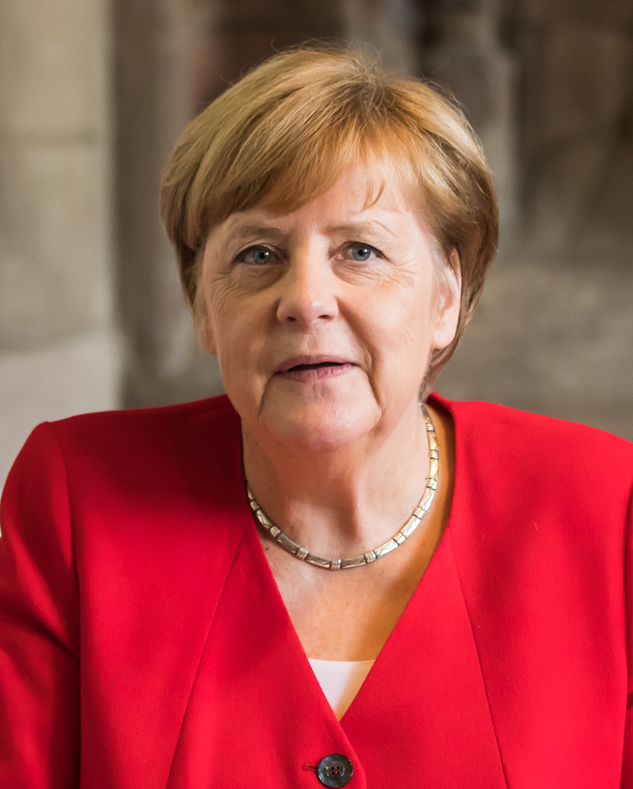

In [41]:
path = "raw_images/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


## Aligning images

All there?
Then let's go ahead and crop on the head.
Run the following skripts to crop and see the results.

In [8]:
!python align_images.py raw_images/ aligned_images/ alignement_vector/

Using TensorFlow backend.
64045056/64040097 [==============================] - 129s 2us/step


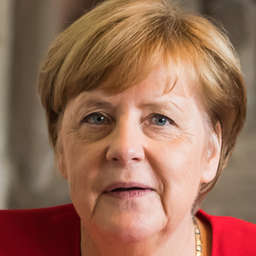

In [42]:
path = "aligned_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

## Encoding

Now comes the fun part. We need to translate what we can see into a latent vector.
for that we will use a StyleGan encoder.

This will take a while, so sit back and let Googles GPU do their jobs...

In [ ]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--vgg_url VGG_URL] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                 

In [ ]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.25 --iterations=750 --use_l1_penalty=0.5 --randomize_noise=True \
    --use_best_loss=True 

Using TensorFlow backend.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
58892288/58889256 [==============================] - 1s 0us/step
  0% 0/1 [00:00<?, ?it/s]Rects:
rectangles[[(46, 81) (201, 236)]]
Saving mask masks/zuckerberg_01.png
Loading mask masks/zuckerberg_01.png

  0% 0/750 [00:00<?, ?it/s]
zuckerberg_01: loss 310.6978; lr 0.2500:   0% 0/750 [00:17<?, ?it/s]
zuckerberg_01: loss 310.6978; lr 0.2500:   0% 1/750 [00:18<3:46:19, 18.13s/it]
zuckerberg_01: loss 291.3265; lr 0.2500:   0% 1/750 [00:19<3:59:56, 19.22s/it]
zuckerberg_01: loss 291.3265; lr 0.2500:   0% 2/750 [00:19<1:59:49,  9.61s/it]
zuckerberg_01: loss 272.2776; lr 0.2500:   0% 2/750 [00:20<2:06:45, 10.17s/it]
zuckerberg_01: loss 272.2776; lr 0.2500:   0% 3/750 [00:20<1:24:24,  6.78s/it]
zuckerberg_01: loss 249.6948; lr 0.2500:   0% 3/750 [00:21<1:29:00,  7.15s/it]
zuckerbe

### Result

And here we go. The following image is the encoded image in latent sapce. It should look pretty similar to the original representation, although it might vary slightly.


If you're not happy with the result try running the encoding again with different parameters.

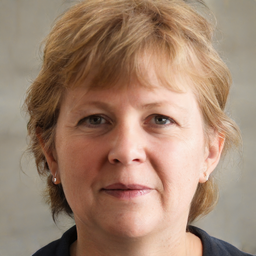

In [40]:
path = "generated_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [15]:
import keras
model = keras.models.load_model('/content/drive/My Drive/RetouchML/models/no_pca.keras')

In [14]:
import math
import pickle
import PIL.Image
import numpy as np
#import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
URL_FFHQ = 'http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir="cache") as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


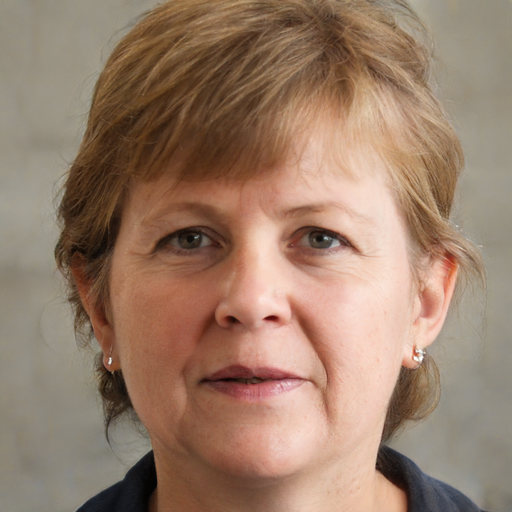

[672.11804 676.0148  705.21484 608.02563 682.53424 672.8639  676.00854
 672.5115  645.7762  697.6084  669.72986 672.90106 673.1168  671.8748
 674.48285 672.92377 673.01013 673.1089 ]


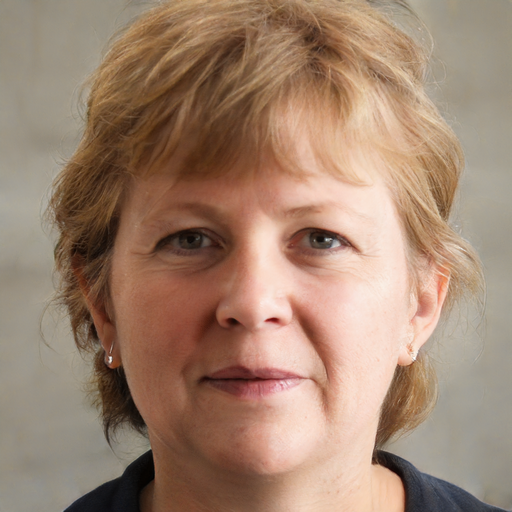

In [36]:
import copy

def scaled(x):
  return 1.5 - (x/18)

latent_vector = np.load('/content/drive/My Drive/RetouchML/latent_representations/merkel_01.npy')
#s2 = np.load('latent_representations/1024px-Donald_Trump_official_portrait_01.npy')
#/content/RetouchML/latent_representations/1024px-Donald_Trump_official_portrait_01.npy
img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))

predictions = model.predict(latent_vector).reshape(-1)
print(predictions)

sorted_indices = np.argsort(predictions)

for k in range(len(predictions)):
  latent_vector[sorted_indices[k]] *= scaled(k)

img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))
img.save("generated_images/merkel_01.png", "PNG")

In [32]:
#/content/RetouchML/masks/IMG_20200209_150540_01.png
img_name = "merkel.jpg"
raw_path = "raw_images/" + img_name
out_path = "out/" + img_name
face_path = "generated_images/" 
mask_path = "masks/"
vector_path = "alignement_vector/"
!python fit_faces.py $raw_path $face_path $mask_path $vector_path $out_path


Using TensorFlow backend.
Done!


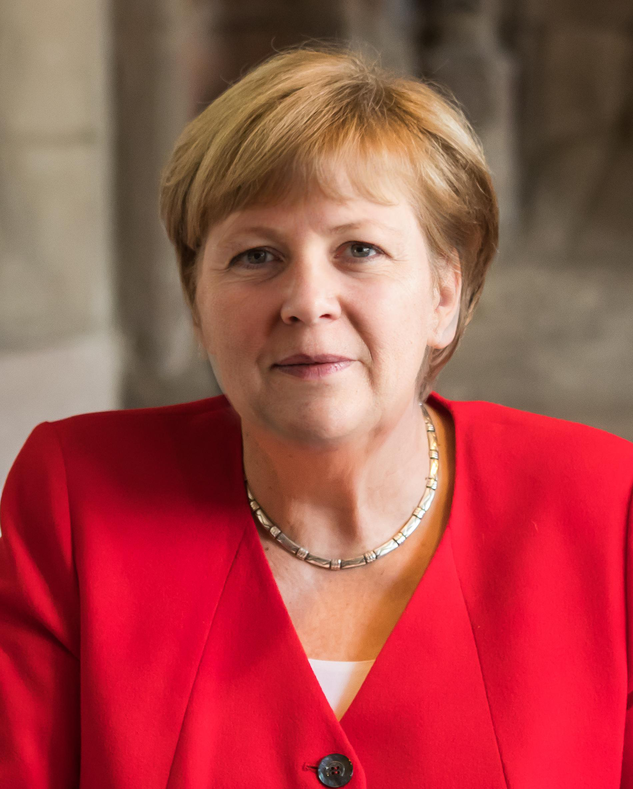

In [35]:
path = "out/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))
